In [1]:
%matplotlib inline

import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [3]:
def standart_scale(X):
    mean = np.mean(X)
    std = np.std(X)
    return (X - mean) / std

In [4]:
X_st = X.copy().astype(np.float128)
X_st[:, 1] = standart_scale(X[:, 1])
X_st[:, 2] = standart_scale(X[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]],
      dtype=float128)

### 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        y_pred = X.dot(W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y)
        dReg = 2 * reg * W
        
        W -= eta * dQ + dReg
        
    print(f'Final W: {W}, Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

Final W: [21.40458602  3.67938308 -5.39655613 19.38526787], Final MSE: 46.38566750559664
Final W: [20.4459035   3.35892711 -5.30364583 19.7568823 ], Final MSE: 49.554144615888475
Final W: [19.54847257  3.02802883 -5.14680546 20.06152271], Final MSE: 53.20499793383582
Final W: [18.70805714  2.69366381 -4.93114681 20.29645996], Final MSE: 57.49069886809925
Final W: [17.91865227  2.36381382 -4.66352243 20.45934681], Final MSE: 62.61664932095964
Final W: [17.17305023  2.04696942 -4.35200233 20.54789721], Final MSE: 68.85761624406531
Final W: [16.46331666  1.75150895 -4.00533389 20.55966019], Final MSE: 76.57958290527145
Final W: [15.78118128  1.48502492 -3.63245306 20.49190324], Final MSE: 86.26689709314317
Final W: [15.11836753  1.25368025 -3.24210525 20.34160978], Final MSE: 98.55334401789716
Final W: [14.46689134  1.0616741  -2.84261048 20.10558993], Final MSE: 114.25426005305955
Final W: [13.81935329  0.91087988 -2.44177214 19.78070219], Final MSE: 134.39512023023926
Final W: [13.16923

<ipython-input-5-52b0a4d0688f>:15: RuntimeWarning: overflow encountered in multiply
  dReg = 2 * reg * W
<ipython-input-5-52b0a4d0688f>:14: RuntimeWarning: invalid value encountered in matmul
  dQ = 2/n * X.T @ (y_pred - y)
<ipython-input-5-52b0a4d0688f>:17: RuntimeWarning: invalid value encountered in subtract
  W -= eta * dQ + dReg


Final W: [nan nan nan nan], Final MSE: nan
Final W: [nan nan nan nan], Final MSE: nan
Final W: [nan nan nan nan], Final MSE: nan
Final W: [nan nan nan nan], Final MSE: nan
Final W: [nan nan nan nan], Final MSE: nan
Final W: [nan nan nan nan], Final MSE: nan
Final W: [nan nan nan nan], Final MSE: nan
Final W: [nan nan nan nan], Final MSE: nan
Final W: [nan nan nan nan], Final MSE: nan
Final W: [nan nan nan nan], Final MSE: nan
Final W: [nan nan nan nan], Final MSE: nan
Final W: [nan nan nan nan], Final MSE: nan
Final W: [nan nan nan nan], Final MSE: nan


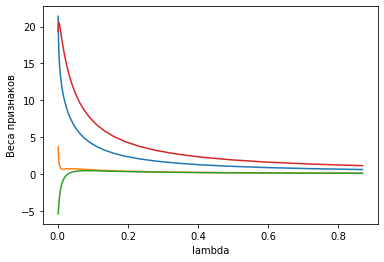

In [6]:
lambda_list = np.logspace(-3, 1, 50)
w_list = []

for i in lambda_list:
    w_list.append(gradient_descent_reg_l2(X_st, y, 10000, eta=1e-2, reg=i))

w_list = np.array(w_list)

for j in range(w_list.shape[1]):
    plt.plot(lambda_list, w_list[:, j])

plt.xlabel('lambda')
plt.ylabel('Веса признаков')
plt.show()

### 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [7]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        y_pred = X.dot(W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y)
        dReg = reg * W/abs(W)
        
        W -= eta * dQ + dReg
    
    print(f'Final W: {W}, Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

Final W: [40.56141192  6.05858633 -0.76340085  9.32115912], Final MSE: 25.031736300248745
Final W: [40.50890187  6.01012783 -0.73233959  9.3454954 ], Final MSE: 25.048286330536975
Final W: [40.4313169   5.95154374 -0.70059114  9.38299206], Final MSE: 25.073294431264642
Final W: [40.50434378  5.88207258 -0.59503416  9.33296099], Final MSE: 25.085290282369836
Final W: [40.48100274  5.79741415 -0.51262501  9.33631396], Final MSE: 25.120953317036182
Final W: [40.3741719   5.69466949 -0.44491363  9.38533416], Final MSE: 25.183469909333258
Final W: [40.3351415   5.5713402  -0.32692983  9.39309746], Final MSE: 25.260177783630276
Final W: [40.35251829  5.4229823  -0.15853178  9.36560208], Final MSE: 25.363414958872013
Final W: [ 4.01634038e+01  5.24239747e+00 -4.00763188e-02  9.45253210e+00], Final MSE: 25.54420205412962
Final W: [ 3.99842720e+01  5.10963816e+00 -1.03970249e-03  9.53820327e+00], Final MSE: 25.69001541303597
Final W: [ 3.96740972e+01  4.96920498e+00 -1.03466919e-02  9.69392441e

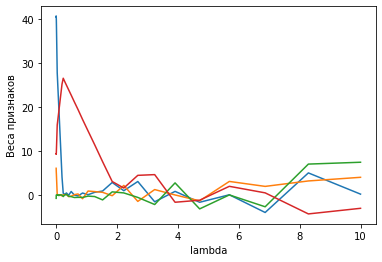

In [8]:
lambda_list = np.logspace(-3, 1, 50)
w_list = []

for i in lambda_list:
    w_list.append(gradient_descent_reg_l1(X_st, y, 5000, eta=1e-2, reg=i))

w_list = np.array(w_list)

for j in range(w_list.shape[1]):
    plt.plot(lambda_list, w_list[:, j])

plt.xlabel('lambda')
plt.ylabel('Веса признаков')
plt.show()

### 3.* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

### 4.* Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [10]:
X, y, coef = make_regression(n_samples=1000, n_features=3, n_informative=2, n_targets=1, noise=10, coef=True, random_state=3)
X, y, coef

(array([[-0.23149741,  0.25508069, -0.23963207],
        [ 0.7788969 ,  0.08905337, -0.96476347],
        [-0.18267639, -0.62544803,  1.77918821],
        ...,
        [ 0.76242483,  0.21483031, -1.00324514],
        [ 0.5587132 , -0.51999175,  0.81481454],
        [-0.87171441,  2.56686854, -0.04623622]]),
 array([ 2.30537500e+00, -1.31565689e+01, -5.38667153e+00, -1.03374570e+02,
        -7.02352844e+01,  2.99538801e+01,  7.16948255e-01, -6.04472551e+01,
        -8.71288911e+01,  2.79583759e+00,  2.85491645e+01, -7.01224873e+01,
        -9.55027657e+01, -1.51225219e+02, -2.42984459e+01,  1.04425162e+02,
        -7.02326535e+01, -1.47517417e+02,  4.74740849e+00,  1.30741920e+02,
        -1.14692671e+02, -1.64455928e+00,  6.40531490e+01,  6.62736841e+01,
        -1.82784364e+00, -1.83005664e+02,  5.21582092e+01, -1.23218586e+02,
        -2.09252322e+01, -8.09495351e+00,  2.84734681e+01,  6.60583295e+01,
        -5.37556952e+01,  1.04758322e+01, -1.51809547e+02, -5.32726917e+01,
       

In [11]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

mean, std

(array([-0.02945792, -0.00114641, -0.02480371]),
 array([0.98080589, 1.00632493, 0.98990929]))

array([ 0.7788969 ,  0.08905337, -0.96476347])